#**Customer Segmentation** <br>
This notebook is using a data of supermarket customers. <br>
Main goal: Cluster the customer based on their demography-liked data <br>
Task: <br>

1.   Explore the data
2.   Pre-processed (cleaning, feature engineering)
3.   Clustering
4.   Cluster Analysis

In [1]:
#install pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 172 kB/s
     |████████████████████████████████| 102 kB 8.5 MB/s 
     |████████████████████████████████| 690 kB 47.4 MB/s 
     |████████████████████████████████| 4.7 MB 53.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 9.8 MB 44.7 MB/s 
     |████████████████████████████████| 296 kB 45.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.0-py2.py3-none-any.whl size=268032 sha256=55058013780b4cb650bc727e3d13f3421da8b4f231ebb246ba0d5003dad00464
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ksowet9/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=97e9e9b5b590a5fc2b34828a510447307e50397ac17949a16a3863515904ec72
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport 


## Import Dataset

In [3]:
#read data
customer  = pd.read_csv('/content/drive/MyDrive/Course_Data/segmentation_data.csv')

## Explore Data

In [4]:
#print head
customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


`ID`  = Customer's ID <br>
`Sex` = Customer's sex type or gender, 0 = Male, 1 = Female <br>
`Marital status` = Customer's marital status, 1 = Married, 0 = Not Married <br>
`Age` = Customer's age <br>
`Education` = Customer's last education, 0 = Unknown, 1 = High school, 2 = University, 3 = Graduate school <br>
`Income` = Customer's annual income in dollars <br>
`Occupation` = Customer's occupation, 0 = Unemployed, 1 = Employed, 2 = Highly qualified employees <br>
`Settlement size` = Customer's domicile city size, 0 = Small, 1 = Mid, 2 = Big 


In [5]:
#print info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
#print describe
customer.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
#df profiling
profile = ProfileReport(customer, title = 'Customer Profiling Report')

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Scaling

In [9]:
#scaling the data using standardization with sklearn.StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customer = scaler.fit_transform(customer.iloc[:, 1:8]) 

In [10]:
scaled_customer

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [11]:
scaled_customer.shape

(2000, 7)

## Hierarchical Clustering

In [12]:
#import library
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
#cluster data
hier_clust = linkage(scaled_customer, method = 'ward')

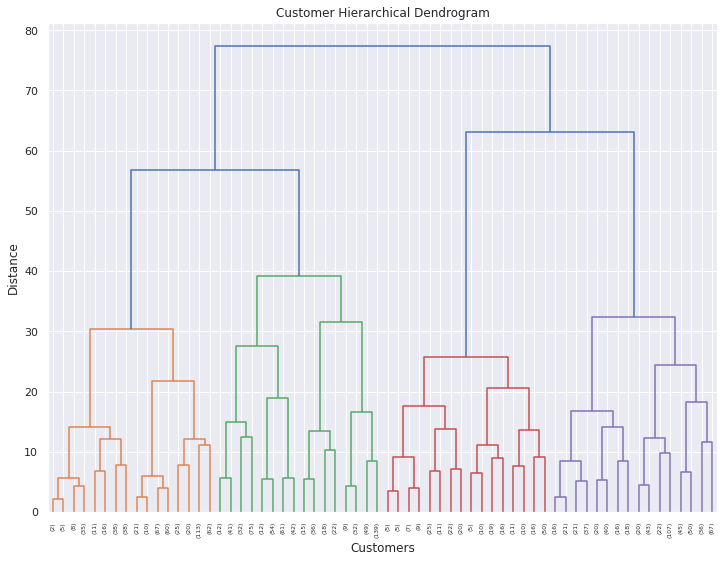

In [14]:
#visualize hier clust
%matplotlib inline
sns.set()
plt.figure(figsize = (12,9))
plt.title('Customer Hierarchical Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           )

plt.show()

From the hierarchical clustering, we can interpret that we can use 4 clusters to get optimal results in customers dataset 

## K-Means Clustering

For the k-means clustering, first we want to use elbow method to determine the best n-clusters for customers data 

In [15]:
#create k-means with 10 variations of n_clusters
inertia = []
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(scaled_customer)
  inertia.append(kmeans.inertia_)

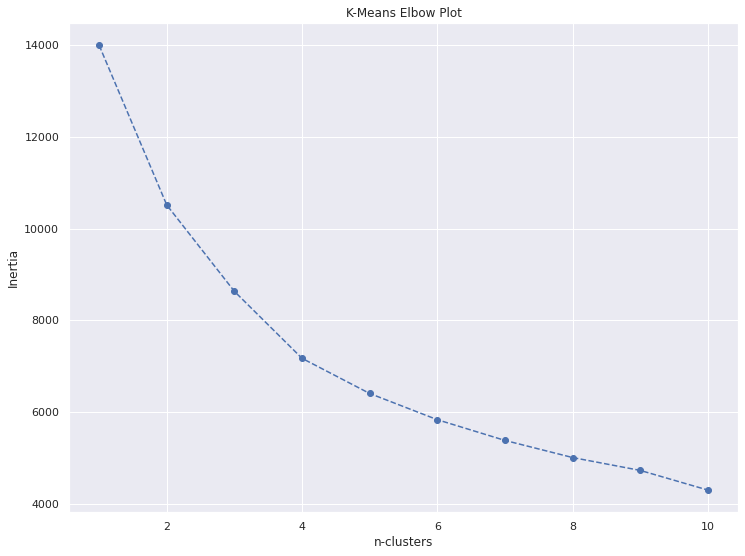

In [16]:
#visualize elbow plot
%matplotlib inline
sns.set()
plt.figure(figsize = (12,9))
plt.title('K-Means Elbow Plot')
plt.xlabel('n-clusters')
plt.ylabel('Inertia')
plt.plot(range(1,11), inertia, '--', marker = 'o')
plt.show()

From the k-means, it is also informed that the optimal n-clusters is 4  

In [17]:
#use k-means with 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [18]:
#fit to customers data
kmeans.fit(scaled_customer)

KMeans(n_clusters=4, random_state=42)

## Cluster Analysis

In [19]:
#map the cluster label
cust_cluster = customer.drop(columns = 'ID')
cust_cluster['cluster'] = kmeans.labels_
cust_cluster.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


In [20]:
#cluster analysis with mean
cust_cluster.groupby('cluster').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


cluster 0 = well-off people <br>
cluster 1 = fewer-opportunities <br>
cluster 2 = average people <br>
cluster 3 = career-focused

## PCA

Since we have 7 features in the data, it will be a bit hard to interpret the  cluster results into actionable insights, also according to correlation heatmap in **Explore Data** section above we have several features that pretty correlated with each other such as `occupation` and `income`. So we can try to reduce the data dimensionalty with Principal Component Analysis 

In [21]:
#import pca from sklearn
from sklearn.decomposition import PCA

In [22]:
#define pca 
pca = PCA()

In [23]:
#fit pca to data
pca.fit(scaled_customer)

PCA()

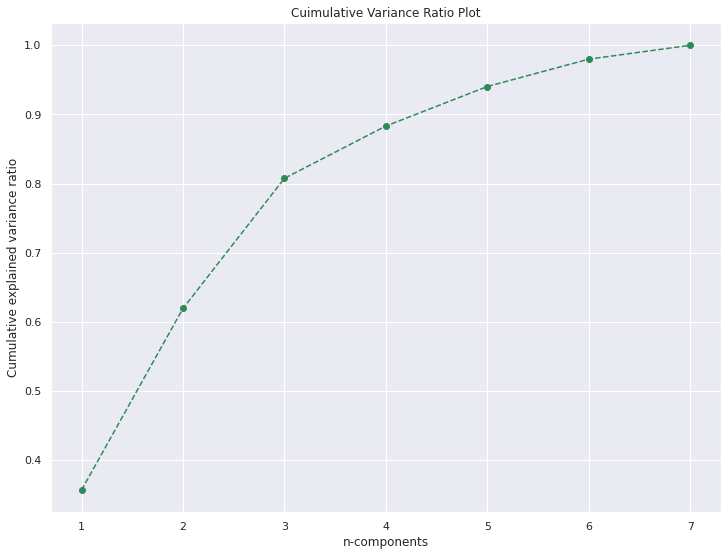

In [24]:
#number of components vs cumulative explained variance ratio
%matplotlib inline
plt.figure(figsize = (12,9))
plt.title('Cuimulative Variance Ratio Plot')
plt.xlabel('n-components')
plt.ylabel('Cumulative explained variance ratio')
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), '--', marker = 'o', color = 'seagreen')
plt.show()

From this plot we'll choose 3 components to continue according to its cumulative explained variance which keeps > 80% information (variance) of the data, So  we can reduce the data dimensions without loosing much information.

In [46]:
#redefine pca with 4 components 
pca = PCA(n_components = 3)

In [47]:
#fit new pca to data
pca.fit(scaled_customer)

PCA(n_components=3)

In [48]:
#print pca components
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [53]:
#create data frame of components
df_components = pd.DataFrame(data = pca.components_, columns = customer.columns.values[1:8], index = ['component 1', 'component 2', 'component 3'])

df_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


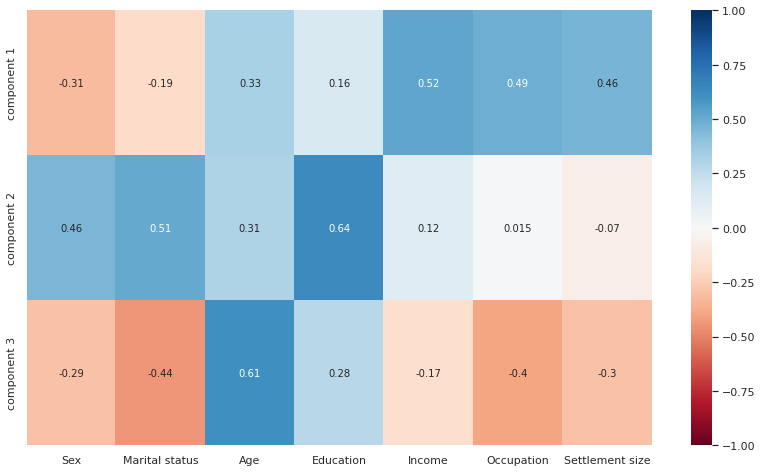

In [51]:
#create heatmap from components (direction of maximum variance)
plt.figure(figsize = (14,8))
sns.heatmap(df_components, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.show()

component 1: correlated with career-related features (income, occupation) <br>
component 2: strongly correlated with customer's life-experience (education, marital status) <br>
component 3: strongly correlated with customer's age <br>

In [54]:
#apply PCA to data
customer_pca = pca.transform(scaled_customer)

## K-Means with PCA

In [55]:
#create k-means with 10 variations of n_clusters
inertia = []
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(customer_pca)
  inertia.append(kmeans.inertia_)

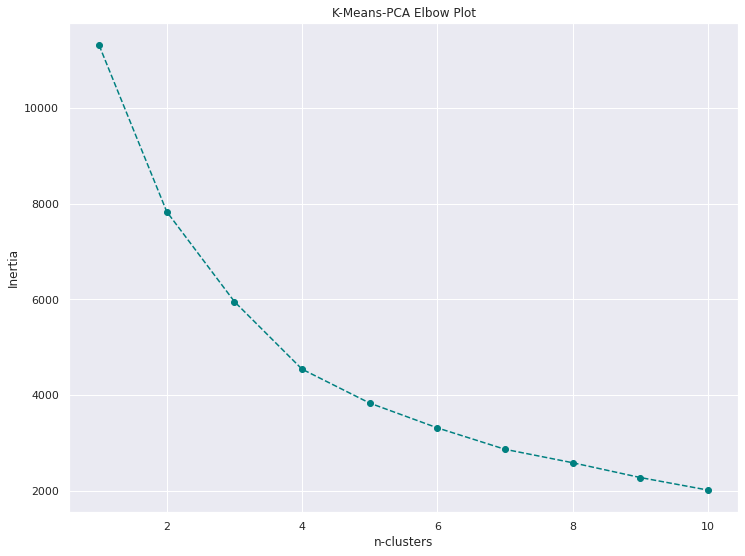

In [56]:
#visualize elbow plot
plt.figure(figsize = (12,9))
plt.title('K-Means-PCA Elbow Plot')
plt.xlabel('n-clusters')
plt.ylabel('Inertia')
plt.plot(range(1,11), inertia, '--', marker = 'o', c = 'teal')
plt.show()

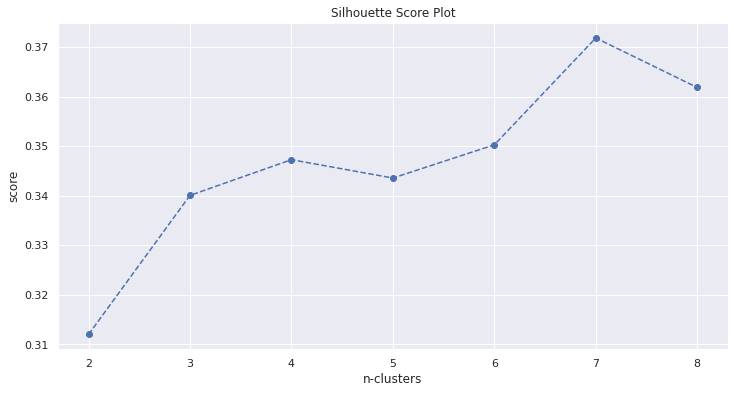

In [57]:
#plot silhoutte score
from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2,9):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(customer_pca)
  score = silhouette_score(customer_pca, kmeans.labels_)
  silhouette.append(score)
plt.figure(figsize = (12,6))
plt.plot(np.arange(2,9), silhouette, '--', marker = 'o')
plt.title('Silhouette Score Plot')
plt.xlabel('n-clusters')
plt.ylabel('score')
plt.show()

We'll choose 4 clusters for our k-means model  

In [58]:
#create k-means model with 4 clusters
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) 

In [59]:
#fit kmeans to data
kmeans_pca.fit(customer_pca)

KMeans(n_clusters=4, random_state=42)

In [64]:
#combine customer features with pca features
df_cluster_pca = pd.concat([customer, pd.DataFrame(customer_pca)], axis = 1)
df_cluster_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_cluster_pca

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
0,100000001,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,100000002,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,100000003,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,100000004,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,100000005,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958
1996,100001997,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871
1997,100001998,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571
1998,100001999,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456


In [68]:
#insert labels
df_cluster_pca['cluster'] = kmeans_pca.labels_

In [69]:
#group by clusters and show cluster means
df_cluster_pca_means = df_cluster_pca.groupby('cluster').mean()
df_cluster_pca_means

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
cluster,,,,,,,,,,,
0,1.000011e+08,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,1.000007e+08,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,1.000012e+08,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,1.000009e+08,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


cluster 0 = average people <br>
cluster 1 = career-focused people <br>
cluster 2 = fewer opportunities people <br>
cluster 3 = well-off people 

In [70]:
#labelling clusters
df_cluster_pca_means = df_cluster_pca_means.rename({0: 'average/standard', 1 : 'career-focused', 2: 'fewer opportunity', 3: 'well-off'})

In [71]:
#labelling cluster with their names
df_cluster_pca['cluster'] = df_cluster_pca['cluster'].map({0: 'average/standard', 1 : 'career-focused', 2: 'fewer opportunity', 3: 'well-off'})
df_cluster_pca.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,cluster
0,100000001,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,well-off
1,100000002,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,average/standard
2,100000003,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,fewer opportunity
3,100000004,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,career-focused
4,100000005,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,career-focused


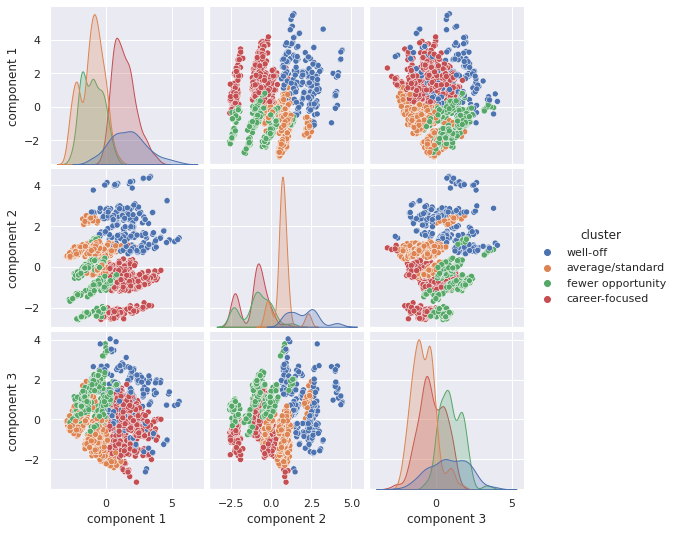

In [72]:
df_pair = df_cluster_pca.iloc[:, -4:]
sns.pairplot(df_pair, hue="cluster", palette = 'deep')

From the image we can see the clusters by the components projections pretty clear. The data points which overlaps other clusters are considered to be determined by other dimensions/component.

# Saving Models

In [73]:
#import pickle package
import pickle

In [74]:
#save the scaler
pickle.dump(scaler, open('/content/drive/MyDrive/Course_Data/scaler.pickle', 'wb'))

In [75]:
#save the pca 
pickle.dump(pca, open('/content/drive/MyDrive/Course_Data/pca.pickle', 'wb'))

In [76]:
#save the kmeans model
pickle.dump(kmeans_pca, open('/content/drive/MyDrive/Course_Data/kmeans_pca.pickle', 'wb'))